In [25]:
import cv2
import torch
import numpy as np
from model import EfficientB4
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
labels = []
with open("/home/data_normal/abiz/wuzhiqiang/wzq/food101/data/classes.txt") as f:
    lines = f.readlines()
    for line in lines:
        labels.append(line.strip())
# print(labels)

In [21]:
image_path = "/home/data_normal/abiz/wuzhiqiang/wzq/food101/data/images/apple_pie/134.jpg"
initial_checkpoint = '/home/data_normal/abiz/wuzhiqiang/wzq/food101/result/0806/fold-0/checkpoint/00014000_model.pth'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [15]:
net = EfficientB4().to(device).eval()

In [16]:
f = torch.load(initial_checkpoint, map_location=lambda storage, loc: storage)
start_iteration = f['iteration']
start_epoch = f['epoch']
state_dict  = f['state_dict']
net.load_state_dict(state_dict,strict=False)  #True

<All keys matched successfully>

In [35]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

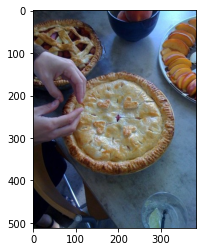

In [36]:
plt.imshow(image)

In [37]:
image = image.astype(np.float32)
image = image.transpose(2, 0, 1)
image = torch.from_numpy(image).contiguous().float().unsqueeze(0)

In [38]:
image = image.to(device)

In [74]:
with torch.no_grad():
    logit = net(image)
    probability = torch.softmax(logit, dim=1)
    predict = probability.topk(5)

In [63]:
logits = predict.values.cpu().detach().numpy()[0]
classes = predict.indices.cpu().detach().numpy()[0]

In [73]:
for i in range(5):
    print(labels[classes[i]], " :", logits[i])

hamburger  : 0.028071258
lobster_roll_sandwich  : 0.024944913
hummus  : 0.024520084
tacos  : 0.02256509
huevos_rancheros  : 0.02168906
